# 기울기

### 기울기 소실 문제

In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.random.seed(0)
weights = np.random.randn(10,10) * 0.01 # 가중치가 작은 값으로 초기화될 수 있게 0.01까지 곱합
x = np.random.randn(10,1)

# Feed Forward
# 9번째 층부터 출력의 평균이 앞 층과 비교했을 때 변화량이 없어짐 
# 미분을 해서 변화량을 구해서 최적의 값을 찾음
# 기울기 소실: 변화량이 거의 없다 == 기울기가 0에 수렴한다 -> 그러면 가중치가 제대로 학습이 되지 않은채로 학습을 중단하게 됨
for i in range(1,11): # 1부터 10층까지의 신경망
    x = sigmoid(np.dot(weights, x)) # 신경망 하나를 통과할 때마다 시그모이드 함수가 적용됨 근데 어느 순간 x가 변하지 않게 됨 
    print(f'{i}번째 층 출력 평균: {np.mean(x)}')


1번째 층 출력 평균: 0.4923981391662232
2번째 층 출력 평균: 0.5007433168636295
3번째 층 출력 평균: 0.5007308165030734
4번째 층 출력 평균: 0.5007305713032845
5번째 층 출력 평균: 0.5007305725302615
6번째 층 출력 평균: 0.5007305725406197
7번째 층 출력 평균: 0.5007305725405601
8번째 층 출력 평균: 0.5007305725405591
9번째 층 출력 평균: 0.5007305725405591
10번째 층 출력 평균: 0.5007305725405591


In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc('font', family=font_prop.get_name())

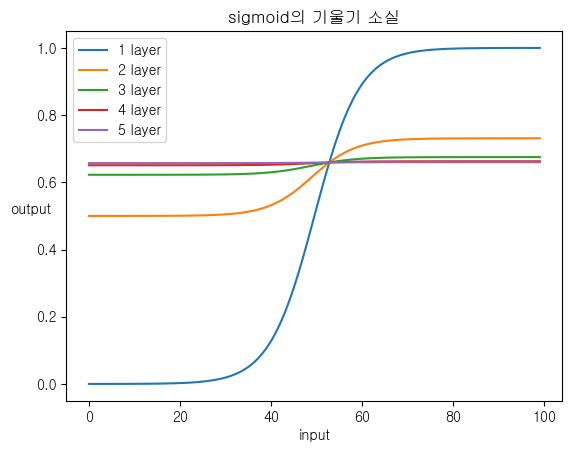

In [4]:
x = np.linspace(-10, 10, 100) # -10부터 10까지의 범위를 가지고 100개의 수를 균등하게 만들어줌

# sigmoid는 여러 차례 넣으면 기울기가 소실되는 문제가 발생함
for i in range(1, 6):
    x = sigmoid(x)
    plt.plot(x, label=f'{i} layer')

plt.xlabel('input')
plt.ylabel('output', rotation=0)
plt.legend()
plt.title('sigmoid의 기울기 소실') #레이어가 높아질수록 기울기는 0에 수렴
plt.show()

- 활성화 함수 변경

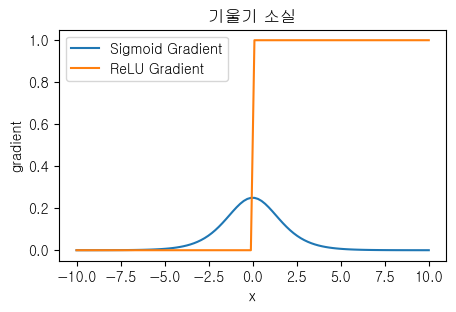

In [5]:
def relu(x):
    return np.maximum(0,x)

# sigmoid 함수의 기울기
# sigmoid 함수는 0,1로 구분돼서 이진 분류에서 사용하는 함수
def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

# relu 함수의 기울기
def relu_grad(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(5,3))
plt.plot(x, sigmoid_grad(x), label='Sigmoid Gradient')
plt.plot(x, relu_grad(x), label='ReLU Gradient')
plt.xlabel('x')
plt.ylabel('gradient')
plt.legend()
plt.title('기울기 소실')
plt.show()

# 기울기가 0에 수렴하면 새 가중치와 기존 가중치의 차이가 없게 돼서 업데이트되지 않음
# 기울기가 0에 수렴하면 기울기 소실이 일어남
# relu: 기울기 소실 문제와 죽은 뉴런이라는 문제가 있어 relu를 변형한 leaky relu를 사용하긴 함
# sigmoid: 양극단의 기울기 소실 문제

- 잔차 연결(Residual Connection) 효과

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(10,10) # (입력 차원, 출력 차원) # 레이어가 10개의 입력과 10개의 출력을 갖게 됨
        self.layer2 = nn.Linear(10,10)
    
    # 순전파
    def forward(self, x):
        return self.layer2(torch.relu(self.layer1(x)))

In [ ]:
class ResidualNN(nn.Module):
    def __init__(self):
        super(ResidualNN, self).__init__()
        self.layer = nn.Linear(10,10)

    # 순전파
    def forward(self,x):
        return x + torch.relu(self.layer(x)) # 잔차 x를 더해줌 # 레이어마다 입력값x가 더해지면서 계속되는 기울기 소실이 일어나지 않고 잘 전달되게 함

# 입력값을 더하는 것을 통해 기울기 소실 문제를 완화시켜서 깊은 신경망에서도 학습할 수 있게 됨

In [ ]:
simple_model = SimpleNN()
residual_model = ResidualNN()

x = torch.randn(1, 10) # 입력값을 랜덤하게 만들어주기

output_simple = simple_model(x)
output_residual = residual_model(x)

print(f'입력값-일반 신경망: {x-output_simple}')
print(f'입력값-잔차 연결 신경망: {x-output_residual}')

입력값-일반 신경망: tensor([[ 1.4213, -0.5887,  2.8140, -1.8901, -1.0034,  1.6993,  1.6141, -0.9761,
         -0.5881, -1.2724]], grad_fn=<SubBackward0>)
입력값-잔차 연결 신경망: tensor([[ 0.0000, -0.7942,  0.0000,  0.0000,  0.0000, -0.2062,  0.0000, -1.1430,
          0.0000,  0.0000]], grad_fn=<SubBackward0>)


In [ ]:
# 기울기 변화

# 데이터 생성
x = torch.randn(100,10)
y = torch.randn(100,10)

# 모델 생성 
sim_model = SimpleNN()
res_model = ResidualNN()

# 손실 함수, 옵티마이저 생성
criterion = nn.MSELoss()
sim_optim = optim.Adam(sim_model.parameters(), lr=0.01)
res_optim = optim.Adam(res_model.parameters(), lr=0.01)

In [18]:
# 학습 루프
epochs = 100
loss_sim_list = []
loss_res_list = []

for epoch in range(epochs):     # 한 번 학습하는걸 epoch이라함

    # SimpleNN: 일반 신경망
    sim_optim.zero_grad()       # 이전 계산한 기울기를 초기화
    sim_output = sim_model(x)   # simplenn에 x를 넣어서 예측값을 만들어줌
    sim_loss = criterion(sim_output, y)     # 모델의 예측값과 실제 동작 데이터 사이의 차이를 구하기 # mse(평균제곱오차)를 사용해 손실을 구함
    sim_loss.backward()                     # 손실값을 기준으로 각 가중치에 대한 기울기를 계산 == 역전파
    sim_optim.step()                        # 기울기를 사용해 모델의 가중치를 업데이트
    loss_sim_list.append(sim_loss.item())   # 빈 리스트에 손실값을 저장

    # ResidualNN: 잔차 연결 신경망
    res_optim.zero_grad()       
    res_output = res_model(x)   
    res_loss = criterion(res_output, y)     
    res_loss.backward()                     
    res_optim.step()                        
    loss_res_list.append(res_loss.item()) 

print(f'일반 신경망 최종 손실값: {loss_sim_list[-1]:.4f}') # 1.0634
print(f'잔차 연결 신경망 최종 손실값: {loss_res_list[-1]:.4f}') # 1.3888: 일반 신경망보다 잔차 연결 신경망의 손실값이 더 큰 이유: 일반 신경망에서는 레이어를 2개를 넣어줬지만 잔차 연결 신경망에서는 레이어를 하나 넣음

for param in sim_model.parameters():
    print(f'일반 신경망 기울기 크기: {param.grad.norm()}')

for param in res_model.parameters():
    print(f'잔차 연결 신경망 기울기 크기: {param.grad.norm()}')

일반 신경망 최종 손실값: 0.7039
잔차 연결 신경망 최종 손실값: 1.4526
일반 신경망 기울기 크기: 0.02049851045012474
일반 신경망 기울기 크기: 0.006255445070564747
일반 신경망 기울기 크기: 0.017965609207749367
일반 신경망 기울기 크기: 0.005214632023125887
잔차 연결 신경망 기울기 크기: 0.090805783867836
잔차 연결 신경망 기울기 크기: 0.02610958367586136


In [ ]:
class DeeperResidualNN(nn.Module): # 위의 ResidualNN과 다른 점: layer2개 추가
    def __init__(self):
        super(DeeperResidualNN, self).__init__() 
        self.layer1 = nn.Linear(10,10)
        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,10)

    def forward(self,x):
        residual = x
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x) # 여기는 왜 relu함수 안했나요?
        return x + residual

In [46]:
class DeeperResidualNN(nn.Module): # 위의 ResidualNN과 다른 점: layer2개 추가
    def __init__(self):
        super(DeeperResidualNN, self).__init__() 
        self.layer1 = nn.Linear(10,10)
        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,10)

    def forward(self,x):
        residual = x
        x = torch.relu(self.layer1(x)) + residual
        residual = x
        x = torch.relu(self.layer2(x)) + residual
        residual = x
        x = self.layer3(x) + residual
        return x

In [30]:
# 위에 있던 것에서 Residual에 layer를 추가했고, 신경망의 기울기를 보기 위해 작성함
#  기울기 변화

# 데이터 생성
x = torch.randn(100,10)
y = torch.randn(100,10)

# 모델 생성 
sim_model = SimpleNN()
res_model = ResidualNN()
deep_res_model = DeeperResidualNN() # 추가

# 손실 함수, 옵티마이저 생성
criterion = nn.MSELoss()
sim_optim = optim.Adam(sim_model.parameters(), lr=0.01)
res_optim = optim.Adam(res_model.parameters(), lr=0.01)
deep_res_optim = optim.Adam(deep_res_model.parameters(), lr=0.01) # 추가

In [54]:
# 학습 루프
epochs = 100
loss_sim_list = []
loss_res_list = []
deep_loss_res_list = []

for epoch in range(epochs):   
    # SimpleNN: 일반 신경망
    sim_optim.zero_grad()  
    sim_output = sim_model(x)
    sim_loss = criterion(sim_output, y)    
    sim_loss.backward()                     
    sim_optim.step()                        
    loss_sim_list.append(sim_loss.item())

    # ResidualNN: 잔차 연결 신경망
    res_optim.zero_grad()       
    res_output = res_model(x)   
    res_loss = criterion(res_output, y)     
    res_loss.backward()                     
    res_optim.step()                        
    loss_res_list.append(res_loss.item())    

    # ResidualNN: 잔차 연결 신경망
    deep_res_optim.zero_grad()       
    deep_res_output = deep_res_model(x)   
    deep_res_loss = criterion(deep_res_output, y)     
    deep_res_loss.backward()                     
    deep_res_optim.step()                        
    deep_loss_res_list.append(deep_res_loss.item()) 

print(f'일반 신경망 최종 손실값: {loss_sim_list[-1]:.4f}')
print(f'잔차 연결 신경망 최종 손실값: {loss_res_list[-1]:.4f}')
print(f'더 깊은 잔차 연결 신경망 최종 손실값: {deep_loss_res_list[-1]:.4f}')

for name, param in sim_model.named_parameters():
    print(f'- 일반 신경망 {name}의 기울기 크기: {param.grad.norm()}')

for name, param in res_model.named_parameters():
    print(f'    - 잔차 연결 신경망 {name}의 기울기 크기: {param.grad.norm()}')

for name, param in deep_res_model.named_parameters():
    print(f'        - 더 깊은 잔차 연결 신경망 {name}의 기울기 크기: {param.grad.norm()}')

일반 신경망 최종 손실값: 0.5852
잔차 연결 신경망 최종 손실값: 1.3665
더 깊은 잔차 연결 신경망 최종 손실값: 0.5408
- 일반 신경망 layer1.weight의 기울기 크기: 0.04611986503005028
- 일반 신경망 layer1.bias의 기울기 크기: 0.02811606228351593
- 일반 신경망 layer2.weight의 기울기 크기: 0.027513273060321808
- 일반 신경망 layer2.bias의 기울기 크기: 0.004983404651284218
    - 잔차 연결 신경망 layer.weight의 기울기 크기: 0.019151007756590843
    - 잔차 연결 신경망 layer.bias의 기울기 크기: 0.005355851724743843
        - 더 깊은 잔차 연결 신경망 layer1.weight의 기울기 크기: 0.12116686999797821
        - 더 깊은 잔차 연결 신경망 layer1.bias의 기울기 크기: 0.04743483290076256
        - 더 깊은 잔차 연결 신경망 layer2.weight의 기울기 크기: 0.190086230635643
        - 더 깊은 잔차 연결 신경망 layer2.bias의 기울기 크기: 0.040539007633924484
        - 더 깊은 잔차 연결 신경망 layer3.weight의 기울기 크기: 0.07287183403968811
        - 더 깊은 잔차 연결 신경망 layer3.bias의 기울기 크기: 0.010554534383118153
